In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv(r"C:\Users\Hp\Downloads\House-price.csv")
dataset.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [12]:
dataset.value_counts().sum()

np.int64(2000)

In [13]:
dataset.shape

(2000, 10)

In [14]:
dataset.size

20000

In [15]:
dataset.ndim

2

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [17]:
dataset.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

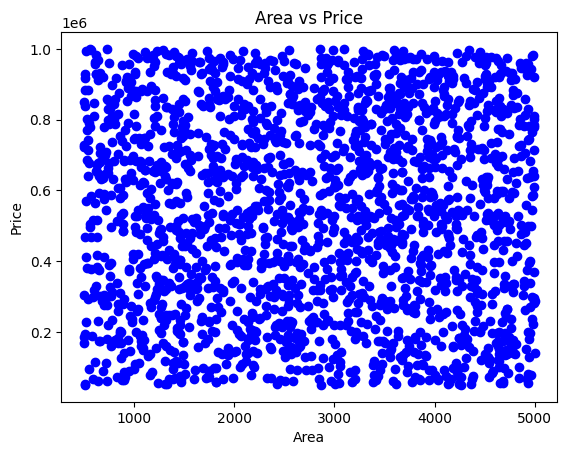

In [18]:
plt.plot(dataset['Area'], dataset['Price'], 'bo')
plt.xlabel('Area')  
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

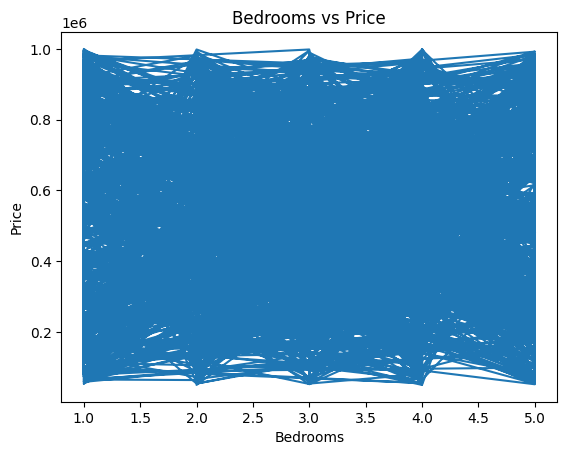

In [19]:
plt.plot(dataset['Bedrooms'], dataset['Price'])
plt.xlabel('Bedrooms')  
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()

In [20]:
import seaborn as sns

C:\Users\Hp\AppData\Local\Temp\ipykernel_5948\3902254670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Price"])


<Axes: xlabel='Price', ylabel='Density'>

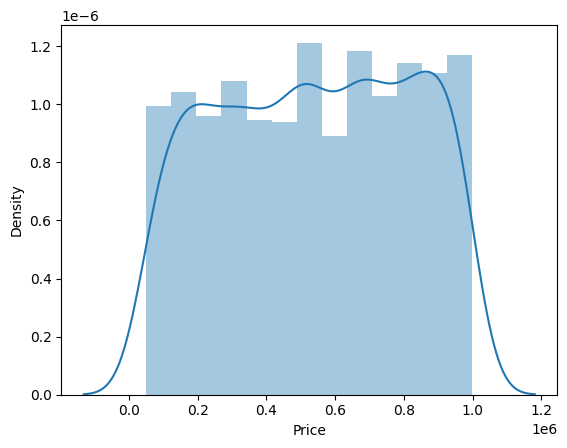

In [21]:
sns.distplot(dataset["Price"])

<Axes: ylabel='count'>

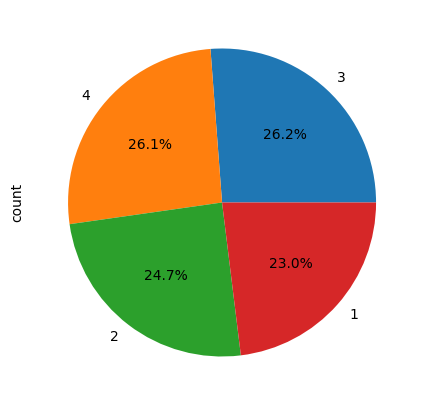

In [22]:
dataset["Bathrooms"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5))

<Axes: ylabel='count'>

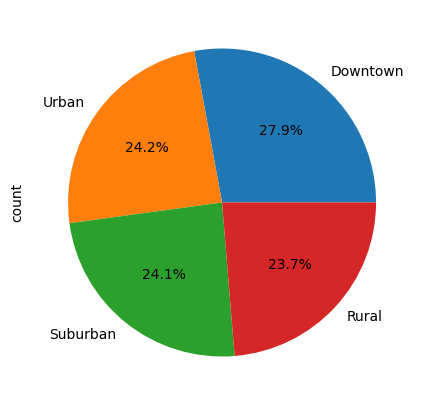

In [23]:
dataset["Location"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5))

<Axes: ylabel='count'>

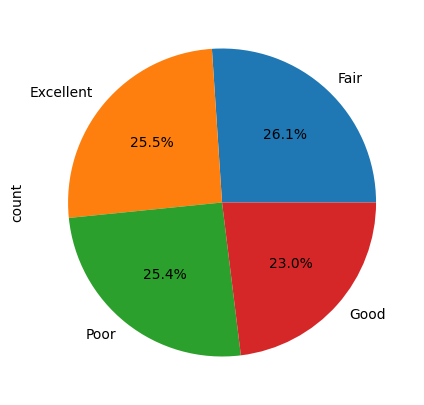

In [24]:
dataset["Condition"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5))

<Axes: ylabel='count'>

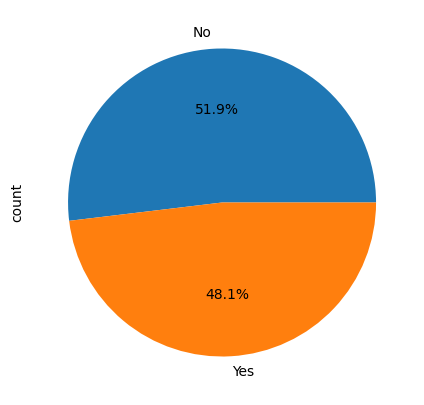

In [25]:
dataset["Garage"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5))

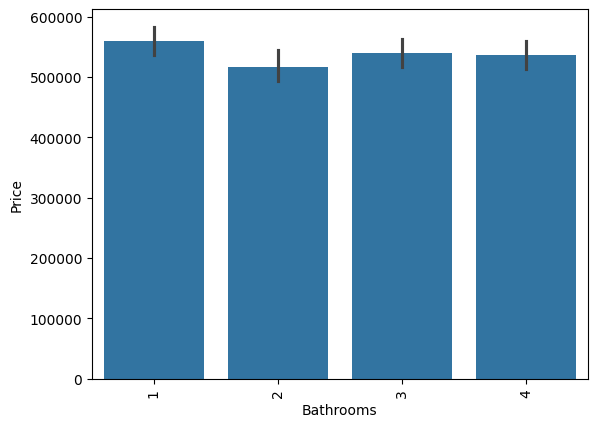

In [26]:
sns.barplot(x=dataset["Bathrooms"],y=dataset["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [27]:
dataset.head(2)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998


In [28]:
dataset['Location']


0       Downtown
1       Downtown
2       Downtown
3       Suburban
4       Downtown
          ...   
1995    Suburban
1996    Suburban
1997       Rural
1998       Urban
1999    Suburban
Name: Location, Length: 2000, dtype: object

In [29]:
dataset.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
condition_mapping = {
    "Poor": 0,
    "Fair": 1,
    "Good": 2,
    "Excellent": 3
}
dataset["House_Age"] = 2025 - dataset["YearBuilt"]
dataset = pd.get_dummies(dataset, columns=["Location"], drop_first=True)
dataset['Garage_encoder'] = le.fit_transform(dataset['Garage'])
dataset["Condition_encoded"] = dataset["Condition"].map(condition_mapping)
dataset = dataset.drop(["Garage", "Condition","YearBuilt","Id"], axis=1)

In [31]:
dataset.head(10)

,Area,Bedrooms,Bathrooms,Floors,Price,House_Age,Location_Rural,Location_Suburban,Location_Urban,Garage_encoder,Condition_encoded
0,1360,5,4,3,149919,55,False,False,False,0,3
1,4272,5,4,3,424998,67,False,False,False,0,3
2,3592,2,2,3,266746,87,False,False,False,0,2
3,966,4,2,2,244020,123,False,True,False,1,1
4,4926,1,4,2,636056,50,False,False,False,1,1
5,3944,1,2,1,93262,119,False,False,True,0,0
6,3671,1,1,2,448722,77,True,False,False,1,0
7,3419,2,4,1,594893,100,False,True,False,1,2
8,630,2,2,1,652878,93,True,False,False,1,0
9,2185,3,3,1,340375,25,False,False,False,0,0


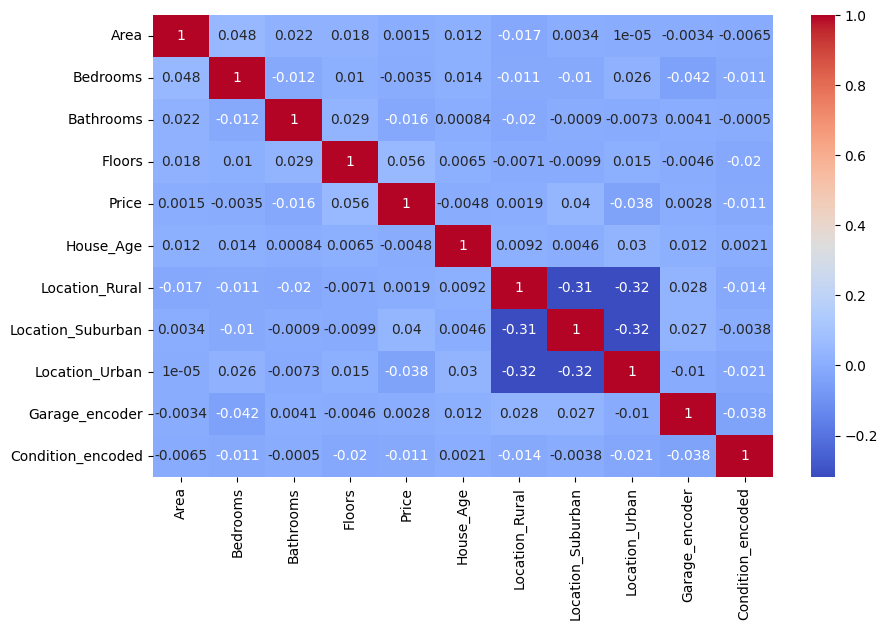

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop("Price", axis=1)
y = dataset["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
X_train

array([[ 1.31408123,  0.68575834,  1.31608835, ...,  1.74660611,
        -0.94999844,  1.35928979],
       [-1.31595997, -0.01488875,  0.41427192, ..., -0.57253893,
        -0.94999844,  0.46904678],
       [-1.03919445, -0.01488875,  1.31608835, ...,  1.74660611,
         1.05263331,  0.46904678],
       ...,
       [-0.99152928, -0.71553584,  0.41427192, ..., -0.57253893,
        -0.94999844,  0.46904678],
       [ 0.52453072,  1.38640543,  1.31608835, ..., -0.57253893,
         1.05263331,  0.46904678],
       [-0.83930825, -0.71553584, -1.38936093, ..., -0.57253893,
        -0.94999844,  0.46904678]], shape=(1600, 10))

In [35]:
y_train

968     434325
240     614772
819     922811
692     794314
420     796988
         ...  
1130    387088
1294    942215
860     323139
1459    274997
1126    644206
Name: Price, Length: 1600, dtype: int64

In [36]:
X_test

array([[-1.64577221, -1.41618293,  1.31608835, ...,  1.74660611,
        -0.94999844, -0.42119622],
       [ 0.83204796, -1.41618293, -1.38936093, ...,  1.74660611,
        -0.94999844, -0.42119622],
       [-0.90388687,  1.38640543,  1.31608835, ...,  1.74660611,
        -0.94999844,  1.35928979],
       ...,
       [ 0.58910934,  0.68575834,  1.31608835, ..., -0.57253893,
         1.05263331, -1.31143923],
       [ 0.68905244,  1.38640543, -0.48754451, ..., -0.57253893,
         1.05263331,  0.46904678],
       [ 0.57296468,  1.38640543, -1.38936093, ...,  1.74660611,
         1.05263331,  0.46904678]], shape=(400, 10))

In [37]:
y_test

1860    514764
353     694256
1333     66375
905     650243
1289    223285
         ...  
965     386940
1284    632570
1739    494049
261     562193
535     447530
Name: Price, Length: 400, dtype: int64

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Random Forest R2 Score:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", rmse)

Random Forest R2 Score: -0.1068511145030111
Random Forest RMSE: 293447.98526191874


In [39]:
y_pred

array([653223.66 , 524919.51 , 559430.06 , 501014.62 , 545624.89 ,
       556993.075, 480386.535, 575328.01 , 657006.01 , 643231.705,
       483354.77 , 632590.6  , 584347.52 , 550620.62 , 529148.045,
       488402.445, 625868.595, 622244.06 , 592147.695, 450002.835,
       503523.345, 448724.11 , 388521.96 , 672164.685, 423651.86 ,
       606666.62 , 387691.11 , 475670.495, 498512.485, 577838.905,
       526528.91 , 608654.695, 587679.145, 580503.84 , 402095.3  ,
       523039.36 , 651129.465, 468522.51 , 577309.82 , 434440.285,
       444559.23 , 561141.4  , 535225.785, 485770.785, 528221.785,
       531343.52 , 552257.625, 428644.555, 491152.86 , 410527.1  ,
       497842.075, 508184.35 , 604818.62 , 513611.465, 544959.355,
       574581.455, 539778.485, 428311.83 , 526532.74 , 527131.205,
       558174.585, 567465.18 , 568096.07 , 470461.455, 565232.16 ,
       480626.11 , 540184.96 , 480038.08 , 476088.15 , 516129.135,
       461684.025, 611475.385, 577667.01 , 521855.805, 519867.

In [40]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [41]:
dataset.head(2)

,Area,Bedrooms,Bathrooms,Floors,Price,House_Age,Location_Rural,Location_Suburban,Location_Urban,Garage_encoder,Condition_encoded
0,1360,5,4,3,149919,55,False,False,False,0,3
1,4272,5,4,3,424998,67,False,False,False,0,3
